<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Cricket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


In [4]:
from google.colab import files
uploaded = files.upload()

Saving 1 - 2019 ODI Cricket Matches.xlsx to 1 - 2019 ODI Cricket Matches.xlsx


In [5]:
cricket_data=pd.read_excel("1 - 2019 ODI Cricket Matches.xlsx")

In [6]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Win by Runs,Win by Wickets,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,61.0,NaN,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,NaN,8.0,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,NaN,4.0,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,183.0,NaN,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,67.0,NaN,ICCA Dubai,2018-01-13,ODI # 3950


In [7]:
most_odi_1=cricket_data["Team 1"].value_counts()

In [8]:
most_odi_2=cricket_data["Team 2"].value_counts()

In [9]:

print(most_odi_1)

Afghanistan     16
Bangladesh      15
New Zealand     13
Sri Lanka       12
Zimbabwe        11
South Africa     9
Ireland          9
England          8
Australia        8
India            7
U.A.E.           5
Hong Kong        4
Scotland         3
West Indies      3
Netherlands      2
P.N.G.           2
Nepal            1
Name: Team 1, dtype: int64


In [10]:
print(most_odi_2)

Pakistan        18
England         16
West Indies     15
Zimbabwe        15
India           13
Scotland         8
South Africa     8
U.A.E.           6
Sri Lanka        5
Australia        5
Bangladesh       5
Ireland          4
Afghanistan      4
P.N.G.           2
Nepal            2
Hong Kong        2
Name: Team 2, dtype: int64


In [11]:
most_odi=most_odi_1+most_odi_2

In [12]:
#Question 2
print(most_odi)

Afghanistan     20.0
Australia       13.0
Bangladesh      20.0
England         24.0
Hong Kong        6.0
India           20.0
Ireland         13.0
Nepal            3.0
Netherlands      NaN
New Zealand      NaN
P.N.G.           4.0
Pakistan         NaN
Scotland        11.0
South Africa    17.0
Sri Lanka       17.0
U.A.E.          11.0
West Indies     18.0
Zimbabwe        26.0
dtype: float64


In [13]:
winner_list=cricket_data["Winner"].value_counts()

In [14]:
#Question 3,13
print(winner_list)

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
West Indies      8
Ireland          8
Pakistan         8
New Zealand      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
no result        2
Australia        2
Nepal            1
Netherlands      1
Hong Kong        1
P.N.G.           1
Name: Winner, dtype: int64


In [15]:
#Question 4
import folium


In [16]:


m = folium.Map(location=[52.3555, 1.1743],zoom_start=2.5)
 

folium.Marker(
    [52.3555, 1.1743], popup="<b>Most winning Country</b>").add_to(m)

m


In [17]:
#question 5
!pip install opencage
from opencage.geocoder import OpenCageGeocode

     |████████████████████████████████| 61kB 4.4MB/s 
     |████████████████████████████████| 2.6MB 20.3MB/s 


In [18]:
key='67c62e2ed671448f972af090d9d1ece7'

In [19]:
geocoder = OpenCageGeocode(key)
list_lat = []   # create empty lists

list_long = []


	
for index, row in cricket_data.iterrows():
  place=row['Ground']     
  query = place

  results = geocoder.geocode(query)   
  lat = results[0]['geometry']['lat']
  long = results[0]['geometry']['lng']
  list_lat.append(lat)
  list_long.append(long)
cricket_data['lat']=list_lat
cricket_data['long']=list_long

	


In [20]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Win by Runs,Win by Wickets,Ground,Match Date,Scorecard,lat,long
0,New Zealand,Pakistan,New Zealand,61 runs,61.0,NaN,Wellington,2018-01-06,ODI # 3946,-41.288795,174.777211
1,New Zealand,Pakistan,New Zealand,8 wickets,NaN,8.0,Nelson,2018-01-09,ODI # 3947,-41.271085,173.283676
2,U.A.E.,Ireland,Ireland,4 wickets,NaN,4.0,ICCA Dubai,2018-01-11,ODI # 3948,25.102259,55.161646
3,New Zealand,Pakistan,New Zealand,183 runs,183.0,NaN,Dunedin,2018-01-13,ODI # 3949,-45.874098,170.503576
4,U.A.E.,Ireland,Ireland,67 runs,67.0,NaN,ICCA Dubai,2018-01-13,ODI # 3950,25.102259,55.161646


In [21]:
country=[]
for index, row in cricket_data.iterrows():
  ctry=row['Ground']
  query=ctry
  results=geocoder.geocode(query)
  c=results[0]['components']['country']
  country.append(c)
cricket_data['Country']=country  
cricket_data.loc[cricket_data['Team 1'] =='U.A.E.', ['Country']] = 'U.A.E.'

In [22]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Win by Runs,Win by Wickets,Ground,Match Date,Scorecard,lat,long,Country
0,New Zealand,Pakistan,New Zealand,61 runs,61.0,NaN,Wellington,2018-01-06,ODI # 3946,-41.288795,174.777211,New Zealand
1,New Zealand,Pakistan,New Zealand,8 wickets,NaN,8.0,Nelson,2018-01-09,ODI # 3947,-41.271085,173.283676,New Zealand
2,U.A.E.,Ireland,Ireland,4 wickets,NaN,4.0,ICCA Dubai,2018-01-11,ODI # 3948,25.102259,55.161646,U.A.E.
3,New Zealand,Pakistan,New Zealand,183 runs,183.0,NaN,Dunedin,2018-01-13,ODI # 3949,-45.874098,170.503576,New Zealand
4,U.A.E.,Ireland,Ireland,67 runs,67.0,NaN,ICCA Dubai,2018-01-13,ODI # 3950,25.102259,55.161646,U.A.E.


In [23]:
import numpy as np
comparison_column = np.where(cricket_data["Team 1"] == cricket_data["Country"], True, False)
cricket_data['equal_1']=comparison_column

In [24]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Win by Runs,Win by Wickets,Ground,Match Date,Scorecard,lat,long,Country,equal_1
0,New Zealand,Pakistan,New Zealand,61 runs,61.0,NaN,Wellington,2018-01-06,ODI # 3946,-41.288795,174.777211,New Zealand,True
1,New Zealand,Pakistan,New Zealand,8 wickets,NaN,8.0,Nelson,2018-01-09,ODI # 3947,-41.271085,173.283676,New Zealand,True
2,U.A.E.,Ireland,Ireland,4 wickets,NaN,4.0,ICCA Dubai,2018-01-11,ODI # 3948,25.102259,55.161646,U.A.E.,True
3,New Zealand,Pakistan,New Zealand,183 runs,183.0,NaN,Dunedin,2018-01-13,ODI # 3949,-45.874098,170.503576,New Zealand,True
4,U.A.E.,Ireland,Ireland,67 runs,67.0,NaN,ICCA Dubai,2018-01-13,ODI # 3950,25.102259,55.161646,U.A.E.,True


In [25]:
equal_1=cricket_data[cricket_data['equal_1']==True]

In [26]:
eq1=equal_1.groupby('Team 1')['equal_1'].sum()
print(eq1)

Team 1
Australia        8
Bangladesh      11
India            5
Netherlands      2
New Zealand      8
South Africa     9
Sri Lanka       10
U.A.E.           5
Zimbabwe        11
Name: equal_1, dtype: int64


In [27]:
comparison_column = np.where(cricket_data["Team 2"] == cricket_data["Country"], True, False)
cricket_data['equal_2']=comparison_column


In [28]:
cricket_data.head()

,Team 1,Team 2,Winner,Margin,Win by Runs,Win by Wickets,Ground,Match Date,Scorecard,lat,long,Country,equal_1,equal_2
0,New Zealand,Pakistan,New Zealand,61 runs,61.0,NaN,Wellington,2018-01-06,ODI # 3946,-41.288795,174.777211,New Zealand,True,False
1,New Zealand,Pakistan,New Zealand,8 wickets,NaN,8.0,Nelson,2018-01-09,ODI # 3947,-41.271085,173.283676,New Zealand,True,False
2,U.A.E.,Ireland,Ireland,4 wickets,NaN,4.0,ICCA Dubai,2018-01-11,ODI # 3948,25.102259,55.161646,U.A.E.,True,False
3,New Zealand,Pakistan,New Zealand,183 runs,183.0,NaN,Dunedin,2018-01-13,ODI # 3949,-45.874098,170.503576,New Zealand,True,False
4,U.A.E.,Ireland,Ireland,67 runs,67.0,NaN,ICCA Dubai,2018-01-13,ODI # 3950,25.102259,55.161646,U.A.E.,True,False


In [29]:
equal_2=cricket_data[cricket_data['equal_2']==True]

In [30]:
eq2=equal_2.groupby('Team 2')['equal_2'].sum()
print(eq2)

Team 2
India    1
Name: equal_2, dtype: int64


In [31]:
#Question 6
sri_lanka=cricket_data[(cricket_data['Team 1']=='Sri Lanka') | (cricket_data['Team 2']=='Sri Lanka')]



In [32]:
print(sri_lanka)

          Team 1        Team 2  ... equal_1 equal_2
9      Sri Lanka      Zimbabwe  ...   False   False
13    Bangladesh     Sri Lanka  ...    True   False
16     Sri Lanka      Zimbabwe  ...   False   False
19    Bangladesh     Sri Lanka  ...    True   False
21    Bangladesh     Sri Lanka  ...    True   False
79     Sri Lanka  South Africa  ...    True   False
81     Sri Lanka  South Africa  ...    True   False
83     Sri Lanka  South Africa  ...    True   False
84     Sri Lanka  South Africa  ...    True   False
85     Sri Lanka  South Africa  ...    True   False
90    Bangladesh     Sri Lanka  ...   False   False
92   Afghanistan     Sri Lanka  ...   False   False
106    Sri Lanka       England  ...    True   False
107    Sri Lanka       England  ...    True   False
108    Sri Lanka       England  ...    True   False
109    Sri Lanka       England  ...    True   False
112    Sri Lanka       England  ...    True   False

[17 rows x 14 columns]


In [33]:
win_column = np.where(sri_lanka["Winner"] == "Sri Lanka", True, False)
sri_lanka['Win/Lose']=win_column                             
                                 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
print(sri_lanka)

          Team 1        Team 2        Winner  ... equal_1  equal_2  Win/Lose
9      Sri Lanka      Zimbabwe      Zimbabwe  ...   False    False     False
13    Bangladesh     Sri Lanka    Bangladesh  ...    True    False     False
16     Sri Lanka      Zimbabwe     Sri Lanka  ...   False    False      True
19    Bangladesh     Sri Lanka     Sri Lanka  ...    True    False      True
21    Bangladesh     Sri Lanka     Sri Lanka  ...    True    False      True
79     Sri Lanka  South Africa  South Africa  ...    True    False     False
81     Sri Lanka  South Africa  South Africa  ...    True    False     False
83     Sri Lanka  South Africa  South Africa  ...    True    False     False
84     Sri Lanka  South Africa     Sri Lanka  ...    True    False      True
85     Sri Lanka  South Africa     Sri Lanka  ...    True    False      True
90    Bangladesh     Sri Lanka    Bangladesh  ...   False    False     False
92   Afghanistan     Sri Lanka   Afghanistan  ...   False    False     False

In [35]:
home_column = np.where(sri_lanka["Country"] == "Sri Lanka", True, False)
sri_lanka['Home/Away']=home_column

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
print(sri_lanka)

          Team 1        Team 2        Winner  ... equal_2  Win/Lose  Home/Away
9      Sri Lanka      Zimbabwe      Zimbabwe  ...   False     False      False
13    Bangladesh     Sri Lanka    Bangladesh  ...   False     False      False
16     Sri Lanka      Zimbabwe     Sri Lanka  ...   False      True      False
19    Bangladesh     Sri Lanka     Sri Lanka  ...   False      True      False
21    Bangladesh     Sri Lanka     Sri Lanka  ...   False      True      False
79     Sri Lanka  South Africa  South Africa  ...   False     False       True
81     Sri Lanka  South Africa  South Africa  ...   False     False       True
83     Sri Lanka  South Africa  South Africa  ...   False     False       True
84     Sri Lanka  South Africa     Sri Lanka  ...   False      True       True
85     Sri Lanka  South Africa     Sri Lanka  ...   False      True       True
90    Bangladesh     Sri Lanka    Bangladesh  ...   False     False      False
92   Afghanistan     Sri Lanka   Afghanistan  ...   

In [37]:
print(sri_lanka['Home/Away'].value_counts())

True     10
False     7
Name: Home/Away, dtype: int64


In [38]:
print(sri_lanka['Winner'].value_counts())

Sri Lanka       6
South Africa    3
England         3
Bangladesh      2
no result       1
Zimbabwe        1
Afghanistan     1
Name: Winner, dtype: int64


In [39]:
#Winning/Losing percentage of Sri Lanka
sri_per=sri_lanka['Win/Lose'].value_counts(normalize=True)*100
print(sri_per)

False    64.705882
True     35.294118
Name: Win/Lose, dtype: float64


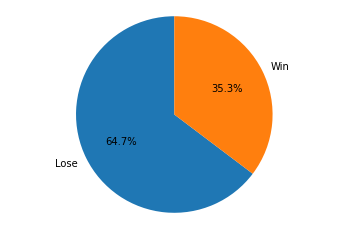

In [40]:
import matplotlib.pyplot as plt
labels=['Lose','Win']
plt.pie(sri_per,labels=labels,startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [41]:
#Winning percentage in the home country Sri Lanka
home_win=sri_lanka[sri_lanka['Country']=='Sri Lanka']
print(home_win)

        Team 1        Team 2        Winner  ... equal_2  Win/Lose  Home/Away
79   Sri Lanka  South Africa  South Africa  ...   False     False       True
81   Sri Lanka  South Africa  South Africa  ...   False     False       True
83   Sri Lanka  South Africa  South Africa  ...   False     False       True
84   Sri Lanka  South Africa     Sri Lanka  ...   False      True       True
85   Sri Lanka  South Africa     Sri Lanka  ...   False      True       True
106  Sri Lanka       England     no result  ...   False     False       True
107  Sri Lanka       England       England  ...   False     False       True
108  Sri Lanka       England       England  ...   False     False       True
109  Sri Lanka       England       England  ...   False     False       True
112  Sri Lanka       England     Sri Lanka  ...   False      True       True

[10 rows x 16 columns]


In [42]:
home_win_per=home_win['Winner'].value_counts(normalize=True)*100
print(home_win_per)

South Africa    30.0
Sri Lanka       30.0
England         30.0
no result       10.0
Name: Winner, dtype: float64


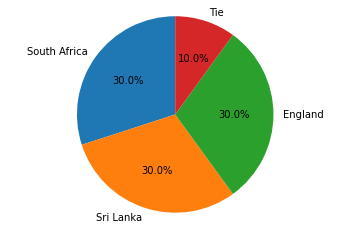

In [43]:
labels=['South Africa','Sri Lanka','England','Tie']
plt.pie(home_win_per,labels=labels,startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [44]:
#winning percentage of Sri Lanka outside home country
not_home_win=sri_lanka[sri_lanka['Country']!='Sri Lanka']
print(not_home_win)

         Team 1     Team 2       Winner  ... equal_2  Win/Lose  Home/Away
9     Sri Lanka   Zimbabwe     Zimbabwe  ...   False     False      False
13   Bangladesh  Sri Lanka   Bangladesh  ...   False     False      False
16    Sri Lanka   Zimbabwe    Sri Lanka  ...   False      True      False
19   Bangladesh  Sri Lanka    Sri Lanka  ...   False      True      False
21   Bangladesh  Sri Lanka    Sri Lanka  ...   False      True      False
90   Bangladesh  Sri Lanka   Bangladesh  ...   False     False      False
92  Afghanistan  Sri Lanka  Afghanistan  ...   False     False      False

[7 rows x 16 columns]


In [45]:
not_home_win_per=not_home_win['Winner'].value_counts(normalize=True)*100
print(not_home_win_per)

Sri Lanka      42.857143
Bangladesh     28.571429
Zimbabwe       14.285714
Afghanistan    14.285714
Name: Winner, dtype: float64


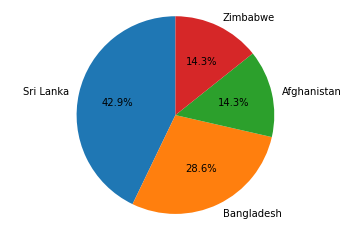

In [46]:
labelsnot=['Sri Lanka','Bangladesh','Afghanistan','Zimbabwe']
plt.pie(not_home_win_per,labels=labelsnot,startangle=90, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

In [47]:
#No of matches played by Sri Lanka compared to other countries
matchcount1=cricket_data['Team 1'].value_counts()
print(matchcount1)



Afghanistan     16
Bangladesh      15
New Zealand     13
Sri Lanka       12
Zimbabwe        11
South Africa     9
Ireland          9
England          8
Australia        8
India            7
U.A.E.           5
Hong Kong        4
Scotland         3
West Indies      3
Netherlands      2
P.N.G.           2
Nepal            1
Name: Team 1, dtype: int64


In [48]:
matchcount2=cricket_data['Team 2'].value_counts()
print(matchcount2)


Pakistan        18
England         16
West Indies     15
Zimbabwe        15
India           13
Scotland         8
South Africa     8
U.A.E.           6
Sri Lanka        5
Australia        5
Bangladesh       5
Ireland          4
Afghanistan      4
P.N.G.           2
Nepal            2
Hong Kong        2
Name: Team 2, dtype: int64


In [49]:
matchcount=matchcount1.add(matchcount2, fill_value=0)
print(matchcount)

Afghanistan     20.0
Australia       13.0
Bangladesh      20.0
England         24.0
Hong Kong        6.0
India           20.0
Ireland         13.0
Nepal            3.0
Netherlands      2.0
New Zealand     13.0
P.N.G.           4.0
Pakistan        18.0
Scotland        11.0
South Africa    17.0
Sri Lanka       17.0
U.A.E.          11.0
West Indies     18.0
Zimbabwe        26.0
dtype: float64


In [50]:
countcountry1=cricket_data['Team 1'].unique()
print(countcountry1)

['New Zealand' 'U.A.E.' 'Australia' 'Bangladesh' 'Ireland' 'Sri Lanka'
 'South Africa' 'Afghanistan' 'P.N.G.' 'Hong Kong' 'Zimbabwe' 'Scotland'
 'England' 'West Indies' 'Netherlands' 'Nepal' 'India']


In [51]:
countcountry2=cricket_data['Team 2'].unique()
print(countcountry2)


['Pakistan' 'Ireland' 'England' 'Zimbabwe' 'Scotland' 'Sri Lanka' 'India'
 'U.A.E.' 'P.N.G.' 'West Indies' 'Afghanistan' 'Hong Kong' 'Australia'
 'Bangladesh' 'South Africa' 'Nepal']


In [52]:
resulting_list = list(countcountry1)
resulting_list.extend(x for x in countcountry2 if x not in resulting_list)
Countries = sorted(resulting_list)
print(Countries)

['Afghanistan', 'Australia', 'Bangladesh', 'England', 'Hong Kong', 'India', 'Ireland', 'Nepal', 'Netherlands', 'New Zealand', 'P.N.G.', 'Pakistan', 'Scotland', 'South Africa', 'Sri Lanka', 'U.A.E.', 'West Indies', 'Zimbabwe']


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

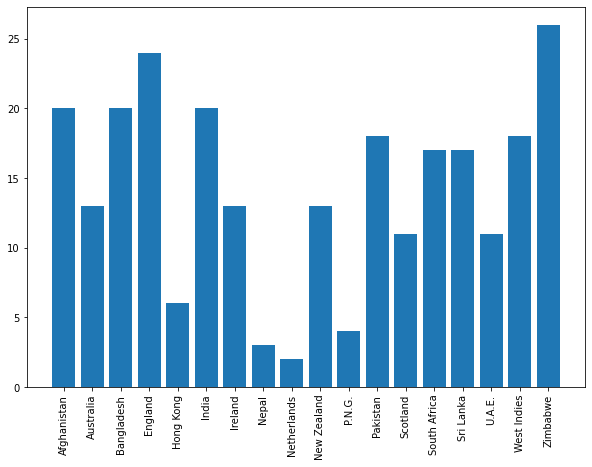

In [53]:
fig = plt.figure(figsize =(10, 7)) 
plt.bar(Countries,matchcount)
plt.xticks(rotation=90)

In [54]:
sri_lanka['Match Date'] = pd.to_datetime(sri_lanka['Match Date'])
dg = sri_lanka.groupby(pd.Grouper(key='Match Date', freq='1M'))['Win/Lose'].sum() # groupby each 1 month
print(dg)

Match Date
2018-01-31    3
2018-02-28    0
2018-03-31    0
2018-04-30    0
2018-05-31    0
2018-06-30    0
2018-07-31    0
2018-08-31    2
2018-09-30    0
2018-10-31    1
Freq: M, Name: Win/Lose, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


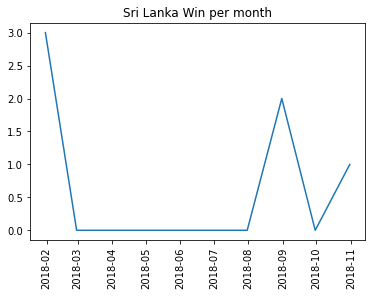

In [55]:
plt.plot(dg)
plt.xticks(rotation=90)
plt.title('Sri Lanka Win per month')
plt.show()

In [56]:
#Question 7
cricket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Team 1          128 non-null    object        
 1   Team 2          128 non-null    object        
 2   Winner          128 non-null    object        
 3   Margin          123 non-null    object        
 4   Win by Runs     63 non-null     float64       
 5   Win by Wickets  58 non-null     float64       
 6   Ground          128 non-null    object        
 7   Match Date      128 non-null    datetime64[ns]
 8   Scorecard       128 non-null    object        
 9   lat             128 non-null    float64       
 10  long            128 non-null    float64       
 11  Country         128 non-null    object        
 12  equal_1         128 non-null    bool          
 13  equal_2         128 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(4), object(7)
memor

In [57]:
winruns=cricket_data.sort_values(by='Win by Runs', ascending=False)
print(winruns[['Team 1','Team 2','Winner','Win by Runs']].head())

        Team 1       Team 2     Winner  Win by Runs
74    Zimbabwe     Pakistan   Pakistan        244.0
65     England    Australia    England        242.0
49     Ireland       U.A.E.    Ireland        226.0
117      India  West Indies      India        224.0
112  Sri Lanka      England  Sri Lanka        219.0


In [58]:
#Question 8,10

cricket_data['Match Date'] = pd.to_datetime(cricket_data['Match Date'])
odimnth = cricket_data.groupby(pd.Grouper(key='Match Date', freq='1M')).size()
print(odimnth.sort_values(ascending=False))


Match Date
2018-03-31    26
2018-01-31    23
2018-10-31    14
2018-09-30    14
2018-02-28    13
2018-07-31    12
2018-08-31    10
2018-11-30     7
2018-06-30     6
2018-12-31     3
2018-05-31     0
2018-04-30     0
dtype: int64


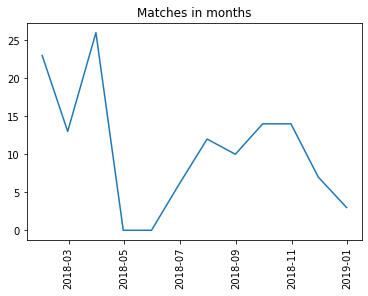

In [59]:
plt.plot(odimnth)
plt.xticks(rotation=90)
plt.title('Matches in months')
plt.show()

In [60]:
#Question 9
not_eq1=cricket_data[cricket_data['equal_1']==False]
neq1=not_eq1.groupby('Team 1')['equal_1'].count()
print(neq1)

Team 1
Afghanistan    16
Bangladesh      4
England         8
Hong Kong       4
India           2
Ireland         9
Nepal           1
New Zealand     5
P.N.G.          2
Scotland        3
Sri Lanka       2
West Indies     3
Name: equal_1, dtype: int64


In [61]:
not_eq2=cricket_data[cricket_data['equal_2']==False]
neq2=not_eq2.groupby('Team 2')['equal_2'].count()
print(neq2)

Team 2
Afghanistan      4
Australia        5
Bangladesh       5
England         16
Hong Kong        2
India           12
Ireland          4
Nepal            2
P.N.G.           2
Pakistan        18
Scotland         8
South Africa     8
Sri Lanka        5
U.A.E.           6
West Indies     15
Zimbabwe        15
Name: equal_2, dtype: int64


In [62]:
neq=neq1.add(neq2, fill_value=0)
print(neq.sort_values(ascending=False))

England         24.0
Afghanistan     20.0
Pakistan        18.0
West Indies     18.0
Zimbabwe        15.0
India           14.0
Ireland         13.0
Scotland        11.0
Bangladesh       9.0
South Africa     8.0
Sri Lanka        7.0
Hong Kong        6.0
U.A.E.           6.0
Australia        5.0
New Zealand      5.0
P.N.G.           4.0
Nepal            3.0
dtype: float64


In [63]:
#Question 11
cricket_data['Ground'].value_counts()
	


Harare                16
Bulawayo              12
Dhaka                 10
Dubai (DSC)            9
Abu Dhabi              7
ICCA Dubai             6
Sharjah                5
Dambulla               4
Pallekele              4
Wellington             3
Belfast                3
Centurion              2
Dunedin                2
Providence             2
Nottingham             2
Hamilton               2
Amstelveen             2
Perth                  2
Adelaide               2
Colombo (RPS)          2
Chattogram             2
Cardiff                1
Port Elizabeth         1
Pune                   1
Basseterre             1
Johannesburg           1
The Oval               1
Bloemfontein           1
Sylhet                 1
Christchurch           1
Cape Town              1
Chester-le-Street      1
Kimberley              1
Visakhapatnam          1
Hobart                 1
Lord's                 1
Kuala Lumpur           1
Mumbai (BS)            1
Thiruvananthapuram     1
Nelson                 1


In [90]:
#Question 12
India=cricket_data[(cricket_data['Team 1']=='India') | (cricket_data['Team 2']=='India')]
print(India)

           Team 1       Team 2  ... equal_1 equal_2
23   South Africa        India  ...    True   False
24   South Africa        India  ...    True   False
25   South Africa        India  ...    True   False
27   South Africa        India  ...    True   False
30   South Africa        India  ...    True   False
32   South Africa        India  ...    True   False
68        England        India  ...   False   False
70        England        India  ...   False    True
72        England        India  ...   False   False
93      Hong Kong        India  ...   False   False
94          India     Pakistan  ...   False   False
96     Bangladesh        India  ...   False   False
98          India     Pakistan  ...   False   False
100   Afghanistan        India  ...   False   False
102    Bangladesh        India  ...   False   False
110         India  West Indies  ...    True   False
113         India  West Indies  ...    True   False
116         India  West Indies  ...    True   False
117         

In [91]:
print(India[['Team 1','Team 2','Winner','Win by Runs','Win by Wickets']])

           Team 1       Team 2        Winner  Win by Runs  Win by Wickets
23   South Africa        India         India          NaN             6.0
24   South Africa        India         India          NaN             9.0
25   South Africa        India         India        124.0             NaN
27   South Africa        India  South Africa          NaN             5.0
30   South Africa        India         India         73.0             NaN
32   South Africa        India         India          NaN             8.0
68        England        India         India          NaN             8.0
70        England        India       England         86.0             NaN
72        England        India       England          NaN             8.0
93      Hong Kong        India         India         26.0             NaN
94          India     Pakistan         India          NaN             8.0
96     Bangladesh        India         India          NaN             7.0
98          India     Pakistan        

In [93]:
India.set_index('Match Date', inplace = True)


In [94]:
India_win=India[India['Winner']=='India']
print(India_win)

                  Team 1       Team 2  ... equal_1 equal_2
Match Date                             ...                
2018-02-01  South Africa        India  ...    True   False
2018-02-04  South Africa        India  ...    True   False
2018-02-07  South Africa        India  ...    True   False
2018-02-13  South Africa        India  ...    True   False
2018-02-16  South Africa        India  ...    True   False
2018-07-12       England        India  ...   False   False
2018-09-18     Hong Kong        India  ...   False   False
2018-09-19         India     Pakistan  ...   False   False
2018-09-21    Bangladesh        India  ...   False   False
2018-09-23         India     Pakistan  ...   False   False
2018-09-28    Bangladesh        India  ...   False   False
2018-10-21         India  West Indies  ...    True   False
2018-10-29         India  West Indies  ...    True   False
2018-11-01         India  West Indies  ...    True   False

[14 rows x 13 columns]


In [95]:
Runsindi=India_win.groupby('Winner')['Win by Runs'].count()
print(Runsindi)

Winner
India    4
Name: Win by Runs, dtype: int64


In [96]:
Wicketsindi=India_win.groupby('Winner')['Win by Wickets'].count()
print(Wicketsindi)

Winner
India    10
Name: Win by Wickets, dtype: int64


In [69]:
#question13
winner_list_per=cricket_data["Winner"].value_counts(normalize=True)*100
print(winner_list_per)

England         13.28125
India           10.93750
Bangladesh      10.15625
Afghanistan      9.37500
South Africa     7.03125
West Indies      6.25000
Ireland          6.25000
Pakistan         6.25000
New Zealand      6.25000
Sri Lanka        4.68750
Scotland         3.90625
Zimbabwe         3.90625
U.A.E.           3.12500
tied             2.34375
no result        1.56250
Australia        1.56250
Nepal            0.78125
Netherlands      0.78125
Hong Kong        0.78125
P.N.G.           0.78125
Name: Winner, dtype: float64


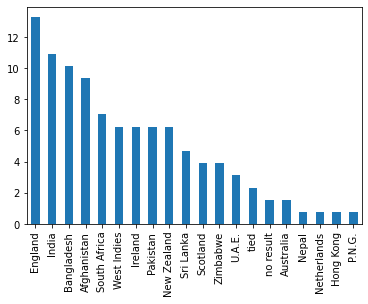

In [70]:
winner_list_per.plot(kind='bar')

In [71]:
England=cricket_data[(cricket_data['Team 1']=='England') | (cricket_data['Team 2']=='England')]

print(England[['Team 1','Team 2','Winner','Match Date']])

          Team 1     Team 2       Winner Match Date
5      Australia    England      England 2018-01-14
12     Australia    England      England 2018-01-19
14     Australia    England      England 2018-01-21
20     Australia    England    Australia 2018-01-26
22     Australia    England      England 2018-01-28
34   New Zealand    England  New Zealand 2018-02-25
35   New Zealand    England      England 2018-02-28
36   New Zealand    England      England 2018-03-03
43   New Zealand    England  New Zealand 2018-03-07
46   New Zealand    England      England 2018-03-10
62      Scotland    England     Scotland 2018-06-10
63       England  Australia      England 2018-06-13
64       England  Australia      England 2018-06-16
65       England  Australia      England 2018-06-19
66       England  Australia      England 2018-06-21
67       England  Australia      England 2018-06-24
68       England      India        India 2018-07-12
70       England      India      England 2018-07-14
72       Eng

In [72]:
England.set_index('Match Date', inplace = True)


In [73]:
England_win=England[England['Winner']=='England']
print(England_win)

                 Team 1     Team 2   Winner  ...         Country  equal_1  equal_2
Match Date                                   ...                                  
2018-01-14    Australia    England  England  ...       Australia     True    False
2018-01-19    Australia    England  England  ...       Australia     True    False
2018-01-21    Australia    England  England  ...       Australia     True    False
2018-01-28    Australia    England  England  ...       Australia     True    False
2018-02-28  New Zealand    England  England  ...     New Zealand     True    False
2018-03-03  New Zealand    England  England  ...     New Zealand     True    False
2018-03-10  New Zealand    England  England  ...     New Zealand     True    False
2018-06-13      England  Australia  England  ...  United Kingdom    False    False
2018-06-16      England  Australia  England  ...  United Kingdom    False    False
2018-06-19      England  Australia  England  ...  United Kingdom    False    False
2018

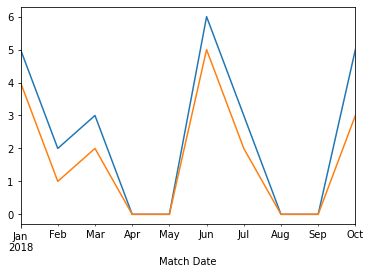

In [74]:
England.resample('1M').count()['Winner'].plot()
England_win.resample('1M').count()['Winner'].plot()


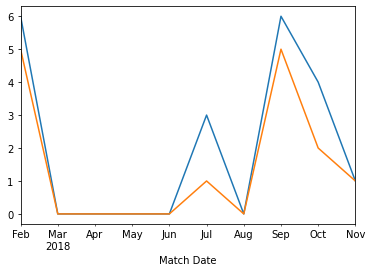

In [97]:
#India_play_month_size=India.groupby(pd.Grouper(key='Match Date',freq='1M')).size()
#India_win_month_size = India_win.groupby(pd.Grouper(key='Match Date', freq='1M')).size()
#winperindie=(India_win_month_size/India_play_month_size)*100
#print(winperindie)

India.resample('1M').count()['Winner'].plot()
India_win.resample('1M').count()['Winner'].plot()


In [76]:
Bangladesh=cricket_data[(cricket_data['Team 1']=='Bangladesh') | (cricket_data['Team 2']=='Bangladesh')]
print(Bangladesh)

          Team 1       Team 2  ... equal_1 equal_2
6     Bangladesh     Zimbabwe  ...    True   False
13    Bangladesh    Sri Lanka  ...    True   False
18    Bangladesh     Zimbabwe  ...    True   False
19    Bangladesh    Sri Lanka  ...    True   False
21    Bangladesh    Sri Lanka  ...    True   False
76   West Indies   Bangladesh  ...   False   False
77   West Indies   Bangladesh  ...   False   False
78   West Indies   Bangladesh  ...   False   False
90    Bangladesh    Sri Lanka  ...   False   False
95   Afghanistan   Bangladesh  ...   False   False
96    Bangladesh        India  ...   False   False
99   Afghanistan   Bangladesh  ...   False   False
101   Bangladesh     Pakistan  ...   False   False
102   Bangladesh        India  ...   False   False
111   Bangladesh     Zimbabwe  ...    True   False
114   Bangladesh     Zimbabwe  ...    True   False
115   Bangladesh     Zimbabwe  ...    True   False
125   Bangladesh  West Indies  ...    True   False
126   Bangladesh  West Indies  

In [98]:
Bangladesh.set_index('Match Date', inplace = True)

In [99]:
Bangla_win=Bangladesh[Bangladesh['Winner']=='Bangladesh']
print(Bangla_win)

                 Team 1       Team 2  ... equal_1 equal_2
Match Date                            ...                
2018-01-15   Bangladesh     Zimbabwe  ...    True   False
2018-01-19   Bangladesh    Sri Lanka  ...    True   False
2018-01-23   Bangladesh     Zimbabwe  ...    True   False
2018-07-22  West Indies   Bangladesh  ...   False   False
2018-07-28  West Indies   Bangladesh  ...   False   False
2018-09-15   Bangladesh    Sri Lanka  ...   False   False
2018-09-23  Afghanistan   Bangladesh  ...   False   False
2018-09-26   Bangladesh     Pakistan  ...   False   False
2018-10-21   Bangladesh     Zimbabwe  ...    True   False
2018-10-24   Bangladesh     Zimbabwe  ...    True   False
2018-10-26   Bangladesh     Zimbabwe  ...    True   False
2018-12-09   Bangladesh  West Indies  ...    True   False
2018-12-14   Bangladesh  West Indies  ...    True   False

[13 rows x 13 columns]


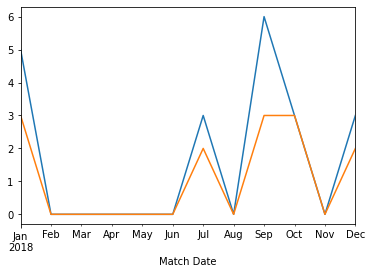

In [100]:
Bangladesh.resample('1M').count()['Winner'].plot()
Bangla_win.resample('1M').count()['Winner'].plot()

In [103]:
Loser_list=cricket_data["Winner"].value_counts(ascending=True)
print(Loser_list)

P.N.G.           1
Hong Kong        1
Netherlands      1
Nepal            1
Australia        2
no result        2
tied             3
U.A.E.           4
Zimbabwe         5
Scotland         5
Sri Lanka        6
New Zealand      8
Pakistan         8
Ireland          8
West Indies      8
South Africa     9
Afghanistan     12
Bangladesh      13
India           14
England         17
Name: Winner, dtype: int64


In [105]:
PNG=cricket_data[(cricket_data['Team 1']=='P.N.G.') | (cricket_data['Team 2']=='P.N.G.')]
print(PNG)

       Team 1       Team 2       Winner  ...   Country  equal_1  equal_2
38     P.N.G.       U.A.E.       U.A.E.  ...  Zimbabwe    False    False
40    Ireland       P.N.G.      Ireland  ...  Zimbabwe    False    False
45     P.N.G.  West Indies  West Indies  ...  Zimbabwe    False    False
54  Hong Kong       P.N.G.       P.N.G.  ...  Zimbabwe    False    False

[4 rows x 14 columns]


In [108]:
PNG_lose=PNG[PNG['Winner']!= 'P.N.G.']
print(PNG_lose)

     Team 1       Team 2       Winner  ...   Country  equal_1  equal_2
38   P.N.G.       U.A.E.       U.A.E.  ...  Zimbabwe    False    False
40  Ireland       P.N.G.      Ireland  ...  Zimbabwe    False    False
45   P.N.G.  West Indies  West Indies  ...  Zimbabwe    False    False

[3 rows x 14 columns]


In [109]:
PNG_lose[['Team 1','Team 2','Winner','Win by Runs','Win by Wickets']]

,Team 1,Team 2,Winner,Win by Runs,Win by Wickets
38,P.N.G.,U.A.E.,U.A.E.,56.0,NaN
40,Ireland,P.N.G.,Ireland,NaN,4.0
45,P.N.G.,West Indies,West Indies,NaN,6.0
